In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mlp
import tensorflow as tf
from tensorflow import keras
import os
import cv2

In [2]:
tf.__version__

'2.0.0-rc1'

In [3]:
pwd

'C:\\Users\\aadarsh\\Desktop\\new_6_month_internship\\FaceMaskDetection-master'

In [4]:
train_dir="dataset"

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
    )


train_generator = train_datagen.flow_from_directory(
        directory='dataset',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        subset ='training'
)

validation_generator = train_datagen.flow_from_directory(
        directory='dataset',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        subset='validation')
     

Found 3067 images belonging to 2 classes.
Found 766 images belonging to 2 classes.


In [7]:
def plotImages(images_arr,l):
    fig, axes = plt.subplots(5, 5, figsize=(20,20))
    #print(axes)
    axes = axes.flatten()
    print(axes)
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(l)
    plt.tight_layout()
    
    plt.show()

In [8]:
sample_training_images, labels = next(validation_generator)# The next function returns a batch from the dataset.
                                                      # The return value of next function is in form of (x_train, y_train)
                                                      # where x_train is training features and y_train, its labels.
                                                      # Discard the labels to only visualize the training images.

NameError: name 'image' is not defined

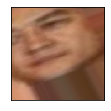

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i%25+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(sample_training_images[i])
  x = image.img_to_array(sample_training_images[i])
  x = np.expand_dims(x,axis = 0)
  c = model.predict_classes(x)
  s="p: {} a: {}".format(c,labels[i])
  plt.xlabel(s)
#plt.show()

In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers


In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',#optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [ ]:
import pydot
import tensorflow
import tensorflow.keras
import graphviz

In [ ]:
tensorflow.keras.utils.plot_model(model)

In [14]:
batch_size=32

In [15]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // batch_size)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
31/95 [========>.....................] - ETA: 2:32 - loss: 0.6210 - accuracy: 0.6683

C:\Users\aadarsh\anaconda3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


87/95 [==========================>...] - ETA: 17s - loss: 0.4577 - accuracy: 0.7906

C:\Users\aadarsh\anaconda3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


95/95 [==============================] - 226s 2s/step - loss: 0.4492 - accuracy: 0.7964 - val_loss: 0.2220 - val_accuracy: 0.9212
Epoch 2/10
23/95 [======>.......................] - ETA: 2:11 - loss: 0.3535 - accuracy: 0.8560

C:\Users\aadarsh\anaconda3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


56/95 [================>.............] - ETA: 1:17 - loss: 0.3329 - accuracy: 0.8644

C:\Users\aadarsh\anaconda3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


95/95 [==============================] - 220s 2s/step - loss: 0.3246 - accuracy: 0.8702 - val_loss: 0.2724 - val_accuracy: 0.8927
Epoch 3/10
47/95 [=============>................] - ETA: 1:56 - loss: 0.3060 - accuracy: 0.8850

C:\Users\aadarsh\anaconda3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


51/95 [===============>..............] - ETA: 1:47 - loss: 0.3101 - accuracy: 0.8811

C:\Users\aadarsh\anaconda3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


95/95 [==============================] - 257s 3s/step - loss: 0.3022 - accuracy: 0.8843 - val_loss: 0.2332 - val_accuracy: 0.9076
Epoch 4/10
20/95 [=====>........................] - ETA: 3:09 - loss: 0.2916 - accuracy: 0.8906

C:\Users\aadarsh\anaconda3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


27/95 [=======>......................] - ETA: 2:36 - loss: 0.2800 - accuracy: 0.8924

C:\Users\aadarsh\anaconda3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


95/95 [==============================] - 194s 2s/step - loss: 0.2695 - accuracy: 0.8988 - val_loss: 0.2770 - val_accuracy: 0.9022
Epoch 5/10
27/95 [=======>......................] - ETA: 1:48 - loss: 0.2513 - accuracy: 0.8970

C:\Users\aadarsh\anaconda3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/95 [=================>............] - ETA: 1:07 - loss: 0.2567 - accuracy: 0.8936

C:\Users\aadarsh\anaconda3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


95/95 [==============================] - 180s 2s/step - loss: 0.2429 - accuracy: 0.9005 - val_loss: 0.1515 - val_accuracy: 0.9524
Epoch 6/10
53/95 [===============>..............] - ETA: 1:19 - loss: 0.2716 - accuracy: 0.8974

C:\Users\aadarsh\anaconda3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


80/95 [========================>.....] - ETA: 26s - loss: 0.2677 - accuracy: 0.9010

C:\Users\aadarsh\anaconda3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


95/95 [==============================] - 182s 2s/step - loss: 0.2666 - accuracy: 0.9002 - val_loss: 0.2031 - val_accuracy: 0.9253
Epoch 7/10
11/95 [==>...........................] - ETA: 2:19 - loss: 0.2540 - accuracy: 0.9205

C:\Users\aadarsh\anaconda3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


70/95 [=====================>........] - ETA: 42s - loss: 0.2521 - accuracy: 0.9094

C:\Users\aadarsh\anaconda3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


95/95 [==============================] - 182s 2s/step - loss: 0.2417 - accuracy: 0.9105 - val_loss: 0.1697 - val_accuracy: 0.9497
Epoch 8/10
20/95 [=====>........................] - ETA: 2:24 - loss: 0.2360 - accuracy: 0.9095

C:\Users\aadarsh\anaconda3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


31/95 [========>.....................] - ETA: 2:03 - loss: 0.2377 - accuracy: 0.9155

C:\Users\aadarsh\anaconda3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


95/95 [==============================] - 189s 2s/step - loss: 0.2348 - accuracy: 0.9139 - val_loss: 0.1767 - val_accuracy: 0.9361
Epoch 9/10
27/95 [=======>......................] - ETA: 1:49 - loss: 0.3051 - accuracy: 0.8854

C:\Users\aadarsh\anaconda3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


73/95 [======================>.......] - ETA: 36s - loss: 0.2679 - accuracy: 0.9007

C:\Users\aadarsh\anaconda3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


95/95 [==============================] - 169s 2s/step - loss: 0.2514 - accuracy: 0.9058 - val_loss: 0.1489 - val_accuracy: 0.9497
Epoch 10/10
49/95 [==============>...............] - ETA: 1:12 - loss: 0.2221 - accuracy: 0.9130

C:\Users\aadarsh\anaconda3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


67/95 [====================>.........] - ETA: 43s - loss: 0.2388 - accuracy: 0.9056

C:\Users\aadarsh\anaconda3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


95/95 [==============================] - 163s 2s/step - loss: 0.2322 - accuracy: 0.9107 - val_loss: 0.1625 - val_accuracy: 0.9402


In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [16]:
model.save("freshface.h5")

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model=load_model("face_mask2.h5")

In [18]:
from keras.preprocessing import image
img = image.load_img("nomask2.jpg",target_size= (150,150))
import numpy as np
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
classes = model.predict_classes(x)

print (classes)

Using TensorFlow backend.


[[0]]


In [ ]:
pwd

In [ ]:
#from keras.models import load_model
import cv2
import numpy as np

#model = load_model('model.h5')

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('nomask1.jpeg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

image = tf.image.decode_jpeg(img)
#image = tf.cast(image, tf.int32)
classes = model.predict_classes(image)

print (classes)

In [ ]:
 face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [ ]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=img[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(150,150))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        result=model.predict_classes(reshaped)
        print(result)

        #label=np.argmax(result,axis=1)[0]
        print(result[0][0])
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[result[0][0]],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[result[0][0]],-1)
        cv2.putText(img, labels_dict[result[0][0]], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

In [ ]:
import numpy as np
s=np.arange(12).reshape(1,2,2,3)

In [1]:
from scipy import stats

In [ ]:
stats.